In [85]:
import tensorflow as tf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [86]:
from datetime import date
from datetime  import timedelta
today = date.today()
pass_1000_days = today - timedelta(days=1000)

print(today)
print(pass_1000_days)

2022-11-09
2020-02-13


In [87]:
df = web.DataReader('CPALL.BK',data_source = 'yahoo',start = pass_1000_days, end = today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-13,72.00,71.25,72.00,71.50,10392600.0,67.348366
2020-02-14,71.25,69.50,71.00,69.75,27581400.0,65.699982
2020-02-17,71.25,69.25,69.75,70.75,18295700.0,66.641914
2020-02-18,71.00,70.00,70.50,70.75,13252800.0,66.641914
2020-02-19,72.00,70.50,71.50,71.50,27644000.0,67.348366
...,...,...,...,...,...,...
2022-11-03,60.75,60.25,60.50,60.75,9190800.0,60.750000
2022-11-04,61.25,60.75,60.75,60.75,23514500.0,60.750000
2022-11-07,61.50,60.75,60.75,60.75,20001600.0,60.750000


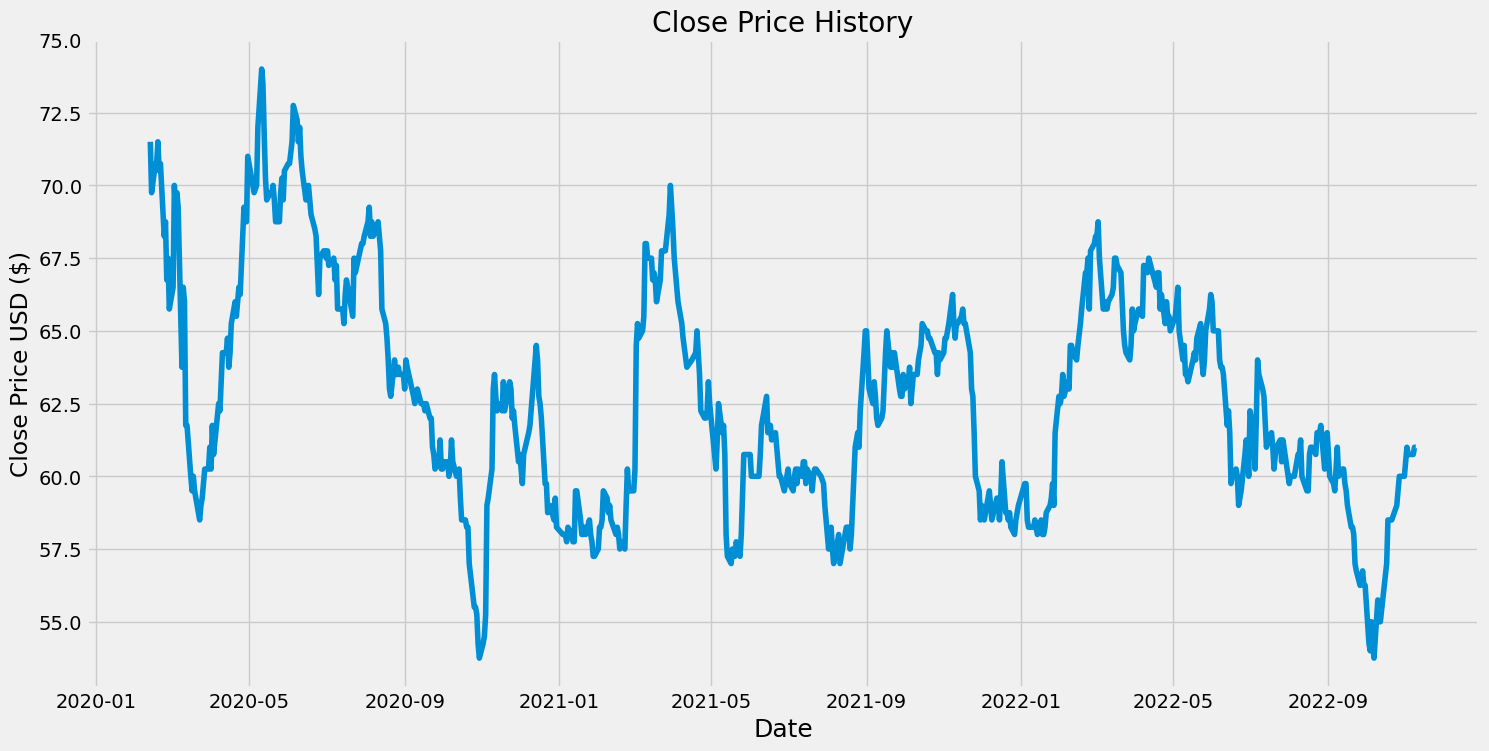

In [88]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)')
plt.show()

In [89]:
z = df.index[0]
z

Timestamp('2020-02-13 00:00:00')

In [90]:
####WINDOWED DATA 4 train 1 target and date of target
length_of_window = 5
index_list = [] # list
target_date= [] # list

new_df = pd.DataFrame()
for j in range(length_of_window):#create data frame for append
    
    new_df['COLUMNS'+str(j+1)] = [] #set columns in list
    index_list.append('COLUMNS'+str(j+1))#set columns in list
     
    
for i in range(len(df)-(length_of_window-1)) :
    x = df['Close'][i:length_of_window+i] # get close values
    print(df.index[(length_of_window-1)+i])
    
    #for i in range(len(x)):
        #print(x[length_of_window-1])
    target_date.append(df.index[(length_of_window-1)+i])   
   
    values=x.set_axis(index_list).to_frame().transpose().reset_index(drop=True) #set columnsname > change type to df > tranpose
    new_df = pd.concat([new_df,values])
    print(values)
    

2020-02-19 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0      71.5     69.75     70.75     70.75      71.5
2020-02-20 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     69.75     70.75     70.75      71.5      70.5
2020-02-21 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     70.75     70.75      71.5      70.5     70.75
2020-02-24 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     70.75      71.5      70.5     70.75     68.25
2020-02-25 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0      71.5      70.5     70.75     68.25     68.75
2020-02-26 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0      70.5     70.75     68.25     68.75     66.75
2020-02-27 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     70.75     68.25     68.75     66.75      67.5
2020-02-28 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     68.25     68.75     66.75      67.5     65.75
2020-03-

   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0      68.5     68.75     67.75     65.75     65.25
2020-08-18 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     68.75     67.75     65.75     65.25     64.75
2020-08-19 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     67.75     65.75     65.25     64.75      64.0
2020-08-20 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     65.75     65.25     64.75      64.0      63.0
2020-08-21 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     65.25     64.75      64.0      63.0     62.75
2020-08-24 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0     64.75      64.0      63.0     62.75      64.0
2020-08-25 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0      64.0      63.0     62.75      64.0      63.5
2020-08-26 00:00:00
   COLUMNS1  COLUMNS2  COLUMNS3  COLUMNS4  COLUMNS5
0      63.0     62.75      64.0      63.5      63.5
2020-08-27 00:00:00
   COLUM

In [96]:
new_df = new_df.reset_index()
TD_series = pd.Series(target_date)
new_df= pd.concat([new_df,TD_series],ignore_index=True , axis = 1)
new_df

,0,1,2,3,4,5,6
0,0,71.50,69.75,70.75,70.75,71.50,2020-02-19
1,0,69.75,70.75,70.75,71.50,70.50,2020-02-20
2,0,70.75,70.75,71.50,70.50,70.75,2020-02-21
3,0,70.75,71.50,70.50,70.75,68.25,2020-02-24
4,0,71.50,70.50,70.75,68.25,68.75,2020-02-25
...,...,...,...,...,...,...,...
652,0,60.00,60.00,60.50,61.00,60.75,2022-11-03
653,0,60.00,60.50,61.00,60.75,60.75,2022-11-04
654,0,60.50,61.00,60.75,60.75,60.75,2022-11-07
655,0,61.00,60.75,60.75,60.75,61.00,2022-11-08
